<a href="https://colab.research.google.com/github/salwaa-hub/UTS_machinelearning_sem4/blob/main/UTS_machinelearning_sem4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Wine Dataset for Clustering**


=== INFO DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None

=== DESKRIPSI DATASET ===
          Alcohol  Malic

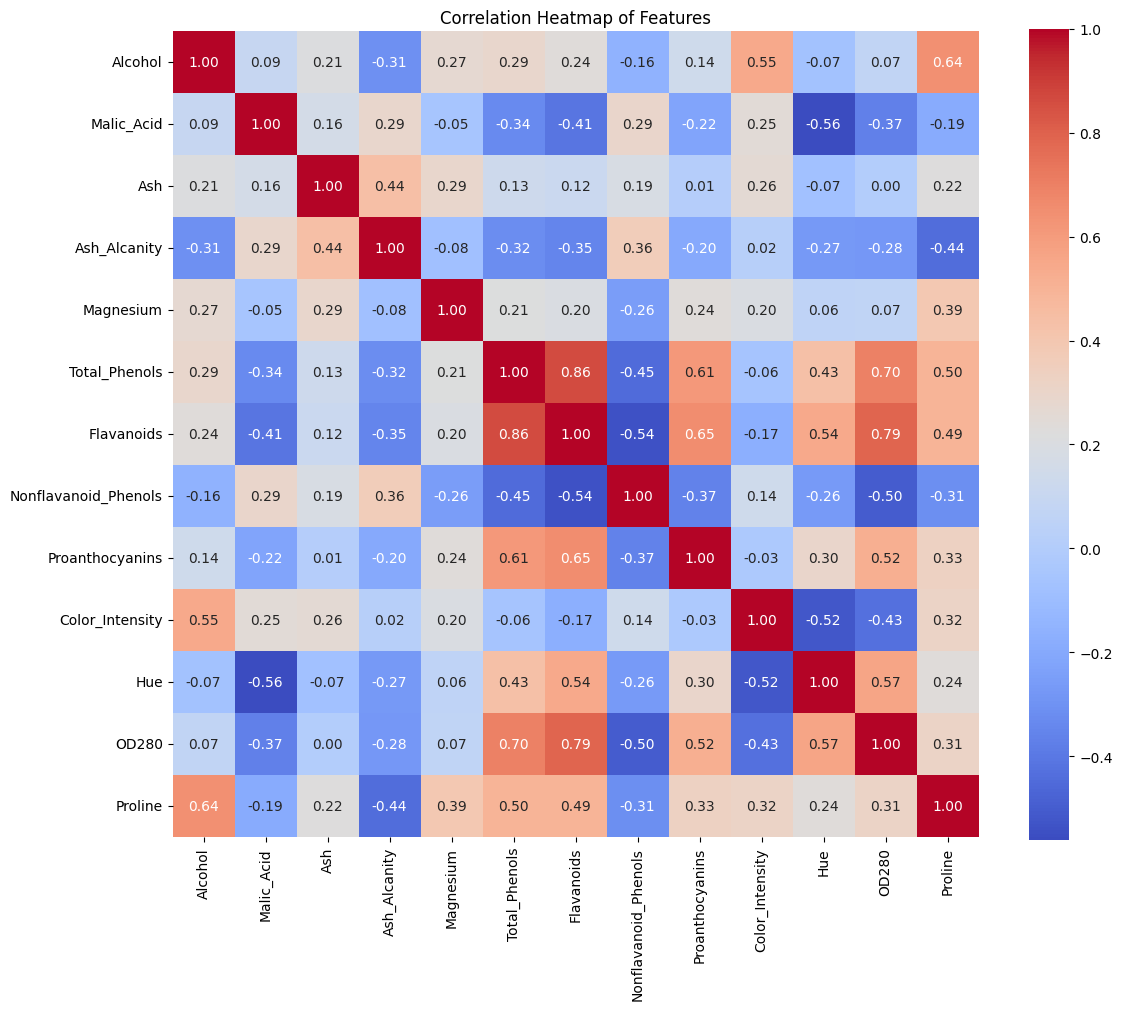

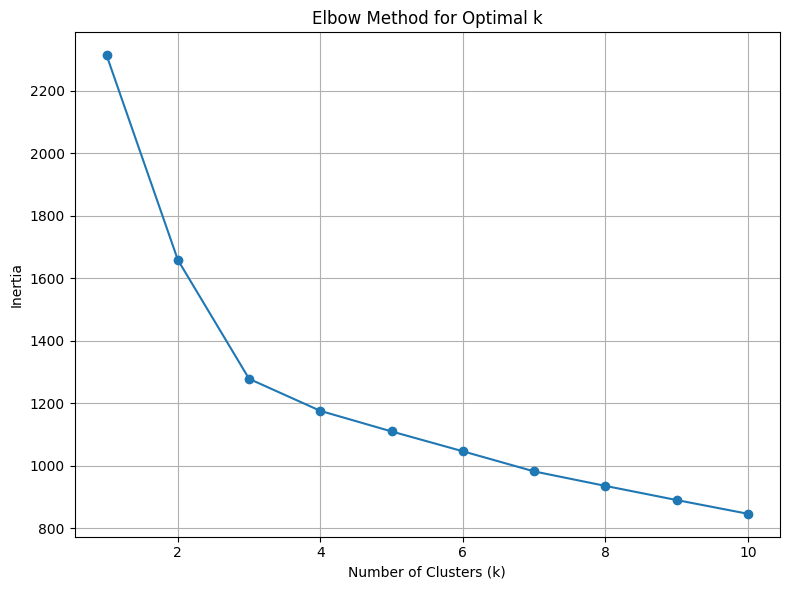

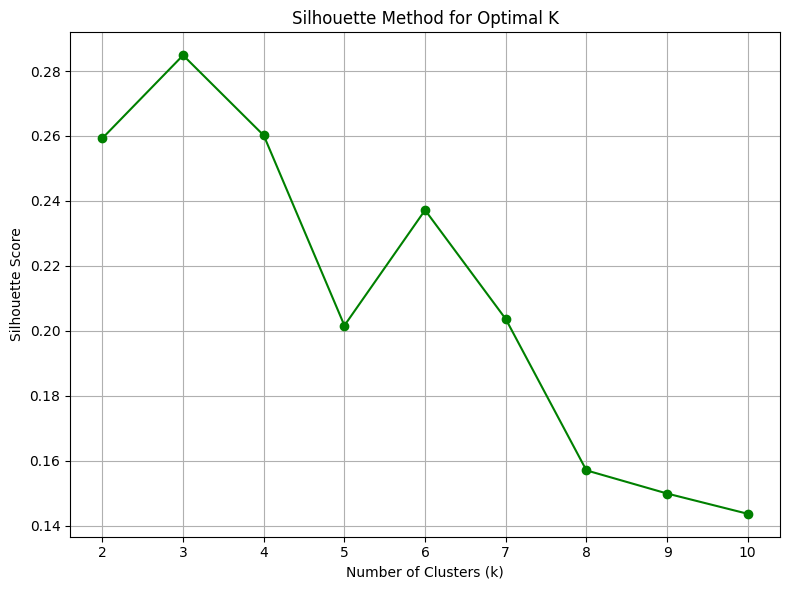


=== ANOVA F-score ===
Alcohol: 113.1661
Color_Intensity: 111.9231
Flavanoids: 271.5898
Hue: 104.7469
Malic_Acid: 38.6689
Nonflavanoid_Phenols: 30.9836
OD280: 221.5284
Proanthocyanins: 36.2124
Proline: 200.3120
Total_Phenols: 106.8832

=== Mutual Information ===
Alcohol: 0.4275
Ash_Alcanity: 0.1896
Color_Intensity: 0.5400
Flavanoids: 0.6634
Hue: 0.4170
Malic_Acid: 0.3080
OD280: 0.5623
Proanthocyanins: 0.2955
Proline: 0.5393
Total_Phenols: 0.4354

=== Random Forest Feature Importance ===
Color_Intensity: 0.1646
Proline: 0.1621
Flavanoids: 0.1537
OD280: 0.1445
Alcohol: 0.0888
Hue: 0.0808
Total_Phenols: 0.0545
Magnesium: 0.0425
Malic_Acid: 0.0409
Ash_Alcanity: 0.0259


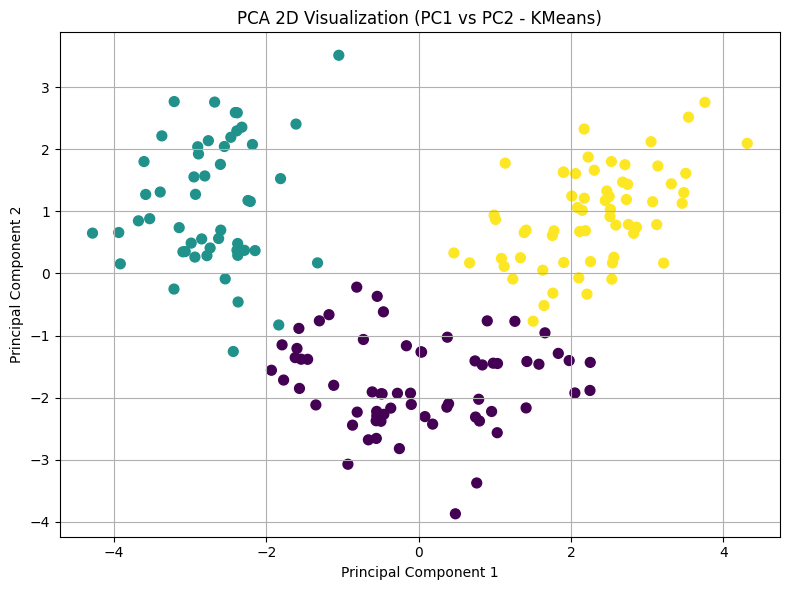


=== PCA Explained Variance Ratio (10 Komponen) ===
PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656
PC6: 0.0494
PC7: 0.0424
PC8: 0.0268
PC9: 0.0222
PC10: 0.0193

=== DBSCAN Clustering ===
Jumlah cluster terdeteksi (DBSCAN): 5
Jumlah noise/outlier: 85
Silhouette Score (DBSCAN): -0.0329


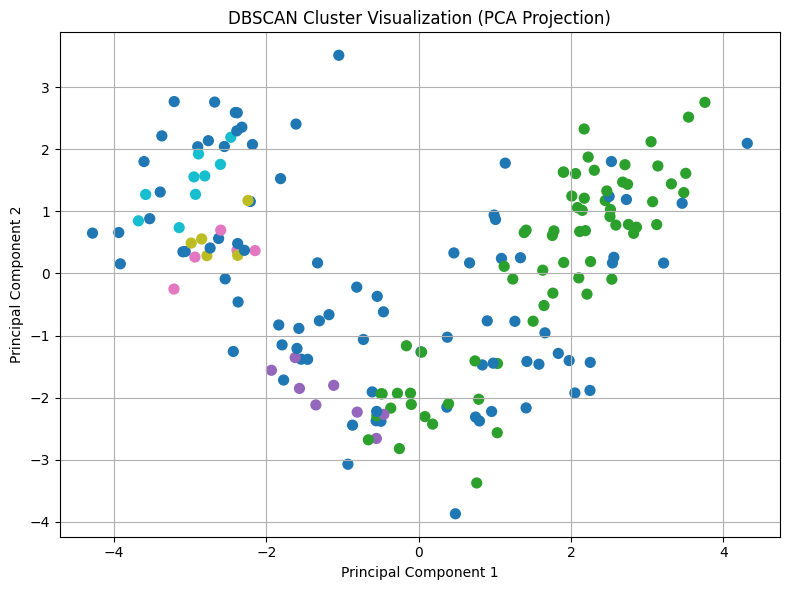


=== CLUSTERING SUMMARY ===

KMeans Clustering Averages (Top 10 ANOVA Features):
                  Alcohol  Color_Intensity  Flavanoids       Hue  Malic_Acid  \
KMeans_Cluster                                                                 
0               12.250923         2.973077    2.050000  1.062708    1.897385   
1               13.134118         7.234706    0.818824  0.691961    3.307255   
2               13.676774         5.453548    3.003226  1.065484    1.997903   

                Nonflavanoid_Phenols     OD280  Proanthocyanins      Proline  \
KMeans_Cluster                                                                 
0                           0.357692  2.803385         1.624154   510.169231   
1                           0.451961  1.696667         1.145882   619.058824   
2                           0.292097  3.163387         1.922097  1100.225806   

                Total_Phenols  
KMeans_Cluster                 
0                    2.247692  
1                    

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier

# ========== 1. LOAD DATASET ==========
df = pd.read_csv("wine-clustering.csv")

# ========== 2. DATA WRANGLING ==========
print("\n=== INFO DATASET ===")
print(df.info())
print("\n=== DESKRIPSI DATASET ===")
print(df.describe())
print("\n=== CEK NILAI NULL ===")
print(df.isnull().sum())

# ========== 3. HEATMAP KORELASI ==========
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

# ========== 4. STANDARISASI ==========
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# ========== 4.5. ELBOW METHOD ==========
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== 4.6. SILHOUETTE METHOD ==========
silhouette_scores = []
k_range_sil = range(2, 11)

for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(k_range_sil, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== 5. CLUSTERING ==========

# --- KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

# --- DBSCAN ---
dbscan = DBSCAN(eps=2.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

# --- Agglomerative ---
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)
df['Agglomerative_Cluster'] = agglo_labels

# ========== 6. FEATURE SELECTION ==========

# Gunakan hanya kolom asli (tanpa label cluster)
feature_cols = df.columns.difference(['KMeans_Cluster', 'DBSCAN_Cluster', 'Agglomerative_Cluster'])
X_features = df[feature_cols]

# --- ANOVA F-score ---
selector_f = SelectKBest(score_func=f_classif, k=10)
selector_f.fit(X_features, kmeans_labels)
features_f = feature_cols[selector_f.get_support()]
scores_f = selector_f.scores_[selector_f.get_support()]

print("\n=== ANOVA F-score ===")
for f, s in zip(features_f, scores_f):
    print(f"{f}: {s:.4f}")
df_f = df[features_f]
df_f.to_csv("wine_selected_f_classif.csv", index=False)

# --- Mutual Information ---
selector_mi = SelectKBest(score_func=mutual_info_classif, k=10)
selector_mi.fit(X_features, kmeans_labels)
features_mi = feature_cols[selector_mi.get_support()]
scores_mi = selector_mi.scores_[selector_mi.get_support()]

print("\n=== Mutual Information ===")
for f, s in zip(features_mi, scores_mi):
    print(f"{f}: {s:.4f}")
df_mi = df[features_mi]
df_mi.to_csv("wine_selected_mutual_info.csv", index=False)

# ========== 7. RANDOM FOREST FEATURE IMPORTANCE ==========
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_features, kmeans_labels)

importances = rf.feature_importances_
feature_importance_pairs = sorted(zip(feature_cols, importances), key=lambda x: x[1], reverse=True)

top_features_rf = [f[0] for f in feature_importance_pairs[:10]]
top_scores_rf = [f[1] for f in feature_importance_pairs[:10]]

print("\n=== Random Forest Feature Importance ===")
for f, s in zip(top_features_rf, top_scores_rf):
    print(f"{f}: {s:.4f}")

df_rf = df[top_features_rf]
df_rf.to_csv("wine_selected_rf_importance.csv", index=False)

# ========== 8. PCA ==========
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(10)])
df_pca.to_csv("wine_pca_10components.csv", index=False)

# ========== 9. VISUALISASI PCA 2D ==========
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("PCA 2D Visualization (PC1 vs PC2 - KMeans)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== 10. PCA Explained Variance ==========
print("\n=== PCA Explained Variance Ratio (10 Komponen) ===")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")

# ========== 11. DBSCAN SUMMARY ==========
print("\n=== DBSCAN Clustering ===")
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Jumlah cluster terdeteksi (DBSCAN): {n_clusters_dbscan}")
print(f"Jumlah noise/outlier: {n_noise}")

if n_clusters_dbscan > 1:
    sil_score = silhouette_score(X_scaled, dbscan_labels)
    print(f"Silhouette Score (DBSCAN): {sil_score:.4f}")
else:
    print("Silhouette Score tidak dapat dihitung karena hanya 1 cluster ditemukan.")

# ========== 12. VISUALISASI DBSCAN ==========
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='tab10', s=50)
plt.title("DBSCAN Cluster Visualization (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# ========== 13. CLUSTERING SUMMARY ==========
print("\n=== CLUSTERING SUMMARY ===")

print("\nKMeans Clustering Averages (Top 10 ANOVA Features):")
print(df.groupby('KMeans_Cluster')[features_f].mean())

print("\nDBSCAN Clustering Averages (Top 10 ANOVA Features):")
print(df.groupby('DBSCAN_Cluster')[features_f].mean())

print("\nAgglomerative Clustering Averages (Top 10 ANOVA Features):")
print(df.groupby('Agglomerative_Cluster')[features_f].mean())